# RQ1: In what period of the year Taxis are used more? 

### Number of trips recorded each day in each month

* Here we are going to analyze the data about the yellow cabs around New York. Our aim is to create a plot for each month, that shows the average number of trips recorded each day. To do that we are going to upload our data with a for loop created outside the notebook and count how many trips there are for each day in every month. At the end we are going to plot the data for each month and for each borough.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import RQ1_functions

* Here we created a loop outside the notebook and calling it with RQ1_functions in order to read all 6 files. The data is too big, that's why we call it this way in order to not to overload the memory. After we convert 'tpep_pickup_datetime' to datetime format in the function and count number of trips recorded each day for every single month. Then we assign the counted data to a variable and plot the data for each of month.

Text(0.5,1,'January')

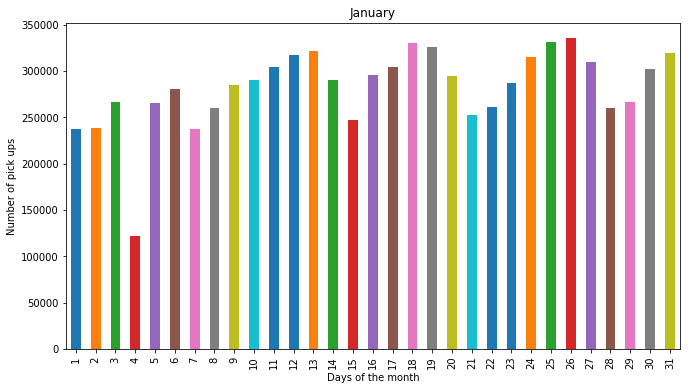

In [22]:
january = RQ1_functions.get_number_of_pick_ups(1)
january.plot(kind = "bar",figsize=(11,6))
plt.ylabel("Number of pick ups")
plt.xlabel("Days of the month")
plt.title("January")

Text(0.5,1,'February')

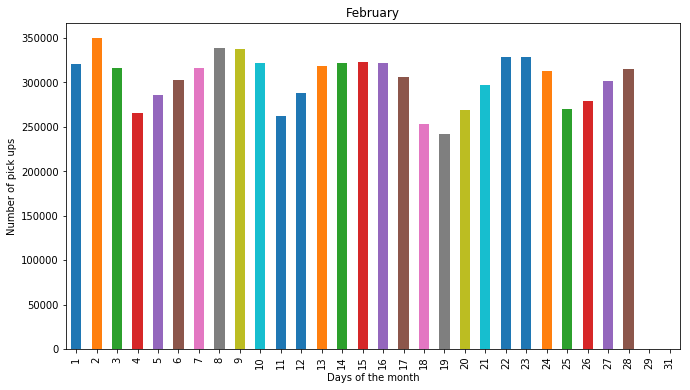

In [21]:
february = RQ1_functions.get_number_of_pick_ups(2)
february.plot(kind = "bar",figsize=(11,6))
plt.ylabel("Number of pick ups")
plt.xlabel("Days of the month")
plt.title("February")

Text(0.5,1,'March')

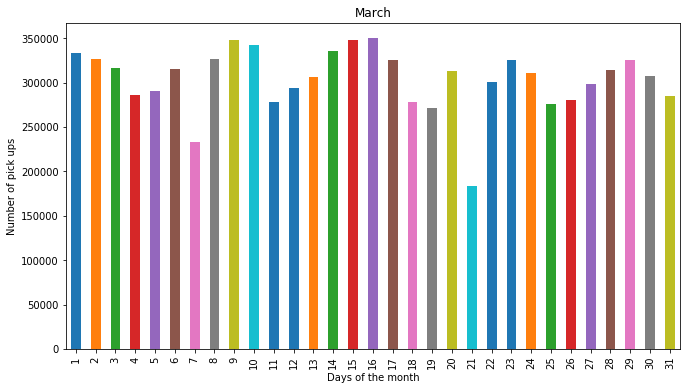

In [20]:
march = RQ1_functions.get_number_of_pick_ups(3)
march.plot(kind = "bar",figsize=(11,6))
plt.ylabel("Number of pick ups")
plt.xlabel("Days of the month")
plt.title("March")

Text(0.5,1,'April')

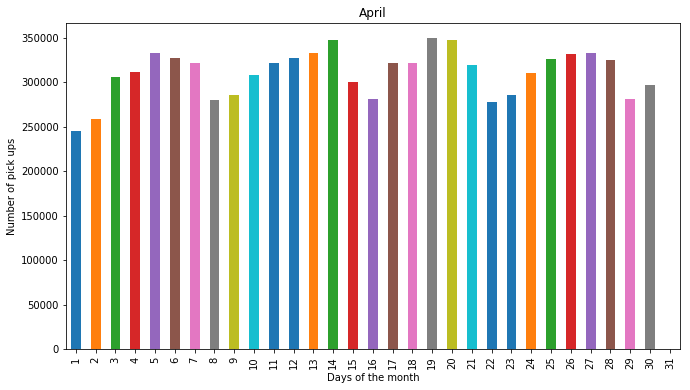

In [19]:
april = RQ1_functions.get_number_of_pick_ups(4)
april.plot(kind = "bar",figsize=(11,6))
plt.ylabel("Number of pick ups")
plt.xlabel("Days of the month")
plt.title("April")

Text(0.5,1,'May')

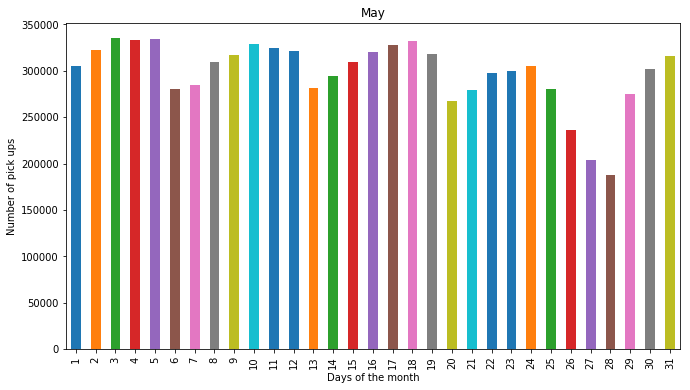

In [18]:
may = RQ1_functions.get_number_of_pick_ups(5)
may.plot(kind = "bar",figsize=(11,6))
plt.ylabel("Number of pick ups")
plt.xlabel("Days of the month")
plt.title("May")

Text(0.5,1,'June')

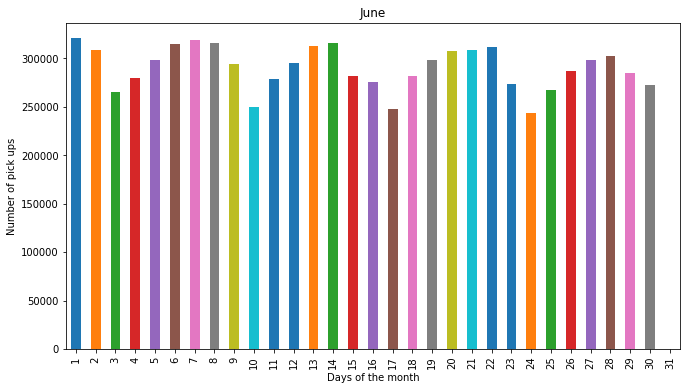

In [16]:
june = RQ1_functions.get_number_of_pick_ups(6)
june.plot(kind = "bar",figsize=(11,6))
plt.ylabel("Number of pick ups")
plt.xlabel("Days of the month")
plt.title("June")

* As it can be seen on the graps that, in every single month and also every single day of the months, the number of trips recorded each day is varying from 200 to 350 thousand, except few outliers. There is no significant difference in months.

* In addition, we can see that, minimum is recorded on January 4, 2018 which is the only day where the number of trips is below 150 thousand during 6 months. 

* Also we can see that there is also no value above 350 thousand in all 6 months.

### Number of trips recorded for each borough

* In order to count and plot the data for each borough, we needed to use taxi_zone_lookup_table file and we also created another csv file with several columns of all the months combined. This is beacuse the Borough column does not exist the original file, so we have to merge them to make the calculation.

In [4]:
all_months.head()

,Unnamed: 0,DOLocationID,PULocationID,duration
0,0,24.0,41.0,3.0
1,1,140.0,239.0,18.0
2,2,141.0,262.0,5.0
3,3,257.0,140.0,32.0
4,4,239.0,246.0,17.0


In [5]:
taxi_zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


* After that we created another variable and combined the data in order to be able to match PULocationID and LocationID to make the count.

In [6]:
merged = all_months.merge(taxi_zone, left_on = "PULocationID", right_on = "LocationID")

In [7]:
merged.head()

,Unnamed: 0,DOLocationID,PULocationID,duration,LocationID,Borough,Zone,service_zone
0,0,24.0,41.0,3.0,41,Manhattan,Central Harlem,Boro Zone
1,385,74.0,41.0,10.0,41,Manhattan,Central Harlem,Boro Zone
2,506,41.0,41.0,2.0,41,Manhattan,Central Harlem,Boro Zone
3,652,112.0,41.0,45.0,41,Manhattan,Central Harlem,Boro Zone
4,911,223.0,41.0,29.0,41,Manhattan,Central Harlem,Boro Zone


* Then we counted the number of trips recorded per Borough during 6 months

In [8]:
merged.Borough.value_counts()

Manhattan        48959840
Queens            3358182
Unknown            864099
Brooklyn           683135
Bronx               55810
EWR                  3854
Staten Island         815
Name: Borough, dtype: int64

* Finally we plotted the data. We decided to plot the bar graph in logarithmic scale, because the number of trips recorded in Manhattan is almost 10 times more than the total of other Boroughs of the New York city. By doing that we can see more precise plot.

* As we said the number of trips recorded in Manhattan is much higher than the other Borough which we can assume that Yellow Taxi is operating more in Manhattan rather than  the other areas of the New York.

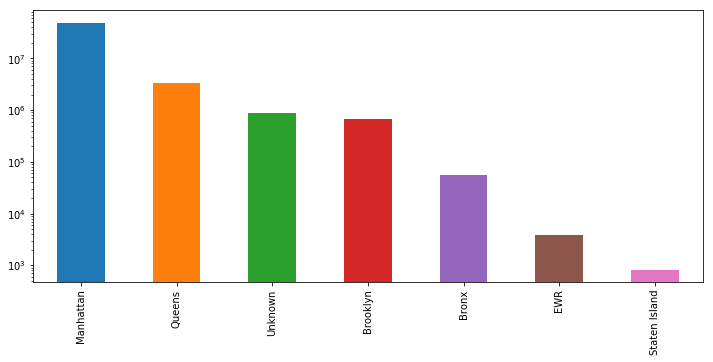

In [11]:
merged.Borough.value_counts().plot(kind = 'bar', logy=True, figsize =(12, 5))

# RQ2: What are the time slots with more passengers?

In the next lines we are going to analyze the data about the movements of yellow taxis around New York. In particular we are interested in when peoples take more cabs. To do that we are going to upload our data and count how many passengers there are for each different time slot. Finally we are going to visualize this data, both for the whole city and for each borough.

We import the python libraries and the costume functions, defined in another file, that we will need for our analysis.

In [1]:
import matplotlib.pyplot
import RQ2_functions

We build a dictonary contaning as keys the name of the boroughs and as values a list of the IDs associated, as seen in the reference file.

In [2]:
boroughs = RQ2_functions.boroughsIdentifyer()

The next function we are going to call will give as output a dictonary and a data frame. They will contain how many trips there are for each time slot. As time slots we decided to use:
-  From 6AM to 10AM: People going to work
-  From 10AM to 12AM: Working hours
-  From 12AM to 15PM: Lunch period
-  From 15PM to 17PM: Working hours
-  From 17PM to 22PM: Dinning period
-  From 22PM to 6AM: Night

The dictonary has the total trip for time slot for the whole city, data frame has them divided by borough. We count the trips as the number of taxi picking up a passenger in Manhattan.

In [3]:
time, time_borough = RQ2_functions.time_slotter(boroughs)

We shall first of all print them as simple tables, to give a look at them.

In [4]:
for item in time.keys():
     print(item.rjust(5), str(time[item]).rjust(20))
time_borough

 6-10              9632329
10-12              5362186
12-15              8617655
15-17              5818869
17-22             15706105
 22-6              8784878


,EWR,Queens,Bronx,Manhattan,Staten Island,Brooklyn
6-10,609,538165,13428,8821911,134,116040
10-12,376,297097,4876,4937470,67,39428
12-15,1025,562206,7529,7836450,97,67269
15-17,652,419218,5239,5246959,69,47720
17-22,695,982309,10165,14273451,152,187171
22-6,497,558968,14572,7840196,296,225450


Now we shall do some effort to visualize the data. We are going to plot them in two histograms with as x-axis the time slots and y-axis the number of trips.

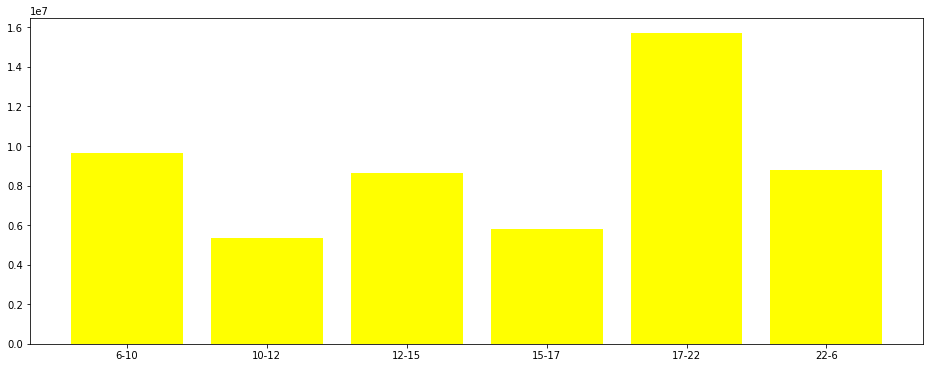

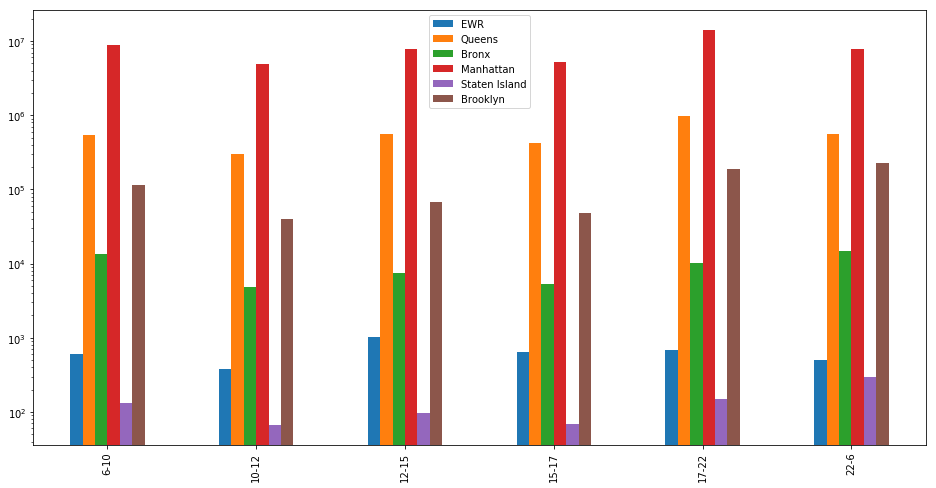

In [5]:
matplotlib.rcParams['figure.figsize'] = (16,6)

matplotlib.pyplot.show(matplotlib.pyplot.bar(time.keys(), time.values(), color='yellow'))

matplotlib.pyplot.show(time_borough.loc[:,[borough for borough in boroughs.keys()]].iloc[:].plot(kind='bar', logy = True, figsize = (16,8)))

We decided to put the second graph in a logarithimc scale. The yellow cab company operates mainly in Manhattan, so the amaunt of trips there is a lot larger. Putting the data in a loharithmic scale allow us to have comprensieble plot.

As we said the trip departing from Manhattan are largely more than the one from other places, therefore the graph for the whole city is more or less the same as the one for Manhattan.

On the second graph we can see the different boroughs. It is particularly interesting to notice that the airport (EWR) does not follow the general tendecies. That is quite intuitive, but our analisys back up this intuition quite nicely.

Let us now visualize the data not by the time slots, but by the boroughs to have a better understanding of what is going on.

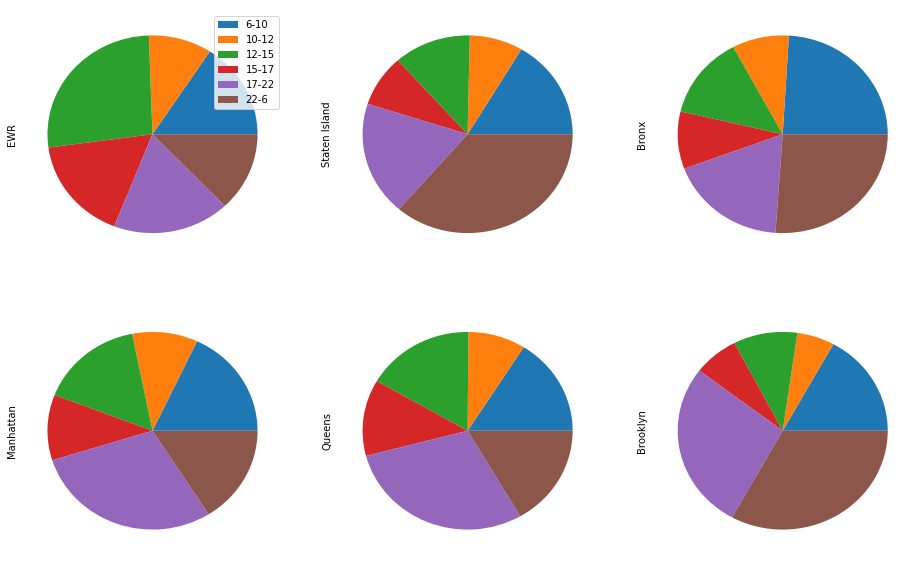

In [7]:
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=3, figsize = (16,10))
c = 0
for borough in boroughs:
    time_borough.plot(kind = 'pie', y=borough, ax = axes[c % 2, c % 3], labels = None, legend = (c == 0))
    c+=1

For a moment don't consider EWR that is, as we already said, quite different from the other boroughs. We can see that the boroughs are quite similar but for the distribution of the 17-22 and 22-6 time slots.

# RQ3: Do the all trips last the same?  (EDA)
Now we are going to analyze the distribution of the duration of the trip. To do this, at the beginning we calculate the trip duration based on data from 2018. Next, we will look at the data and on this basis we will perform filtration and cleaning. Next, we will launch the analysis for NYC and for each borough, while visualizing the results accordingly.

We import Python libraries and functions defined in another file that we will need for our analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import RQ3_functions
import warnings; warnings.simplefilter('ignore')

In the analysis, we used the following data columns:
* **tpep_pickup_datetime** - The date and time when the meter was engaged.
* **tpep_dropoff_datetime** -  The date and time when the meter was disengaged. 
* **PULocationID** -  TLC Taxi Zone in which the taximeter was engaged
* **DOLocationID** -  TLC Taxi Zone in which the taximeter was disengaged


We calculated the duration of all taxi journeys each month, which is the time between column "tpep_pickup_datetime" and column "tpep_dropoff_datetime". 

The function **get_trip_duration_all_months** returns a data frame with interested columns and an additional column that contains the calculated values in minutes.

In [7]:
# trip_duration_all_months_df = pd.read_csv("D:/trip_duration_all_months_df.csv")

In [3]:
trip_duration_all_months_df = RQ3_functions.get_trip_duration_all_months(path = "D:/")

Information about boroughs is obtained from the CSV table : taxi_zone_lookup.csv

In [4]:
taxi_zone_lookup = pd.read_csv("taxi_zone_lookup.csv")
print("The unique boroughs are: {}".format(taxi_zone_lookup["Borough"].unique()))

The unique boroughs are: ['EWR' 'Queens' 'Bronx' 'Manhattan' 'Staten Island' 'Brooklyn' 'Unknown']


After preliminary analysis we see that there are six boroughs, which corresponds to the LocationID column. It has also been noticed that the data contains "Unknown" locations.

------------

### Data filtration and cleaning 


We check the most common statistics about the **duration** column:

In [8]:
trip_duration_all_months_df.duration.describe(percentiles=[0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

count    5.392574e+07
mean     1.604486e+01
std      1.455252e+03
min     -1.066961e+07
50%      1.000000e+01
60%      1.300000e+01
70%      1.600000e+01
80%      2.000000e+01
90%      2.700000e+01
95%      3.600000e+01
99%      6.100000e+01
max      8.852000e+03
Name: duration, dtype: float64

* We observe that **the minimum value is less than 0 minutes**. It is in reality impossible (probably there was a mistake). Thus, it is reasonable to ignore values less than 0 minutes as well as equal to 0. 
* What about the upper range? We noticed that **the maximum value is much higher than 99th percentile**. For the further analysis we wanna ignore the outliers. 
--------------
To decide where to set the upper limit for data on trip length, we check for a few selected values their percentiles.

In [9]:
print("Trip duration less than...")
for score in range(70, 130, 10):
    print("{0} mins -> {1:.3f} percentile".format(score, stats.percentileofscore(trip_duration_all_months_df.duration, score)))

Trip duration less than...
70 mins -> 99.393 percentile
80 mins -> 99.610 percentile
90 mins -> 99.713 percentile
100 mins -> 99.757 percentile
110 mins -> 99.775 percentile
120 mins -> 99.783 percentile


* It seems rational to conduct analysis for **trips under 100 minutes**, that represent a significant amount of data.

Subsequently, on the basis of the above analyzes and assumptions, we filter the data on the duration of the trip.

In [10]:
filtered_trip_duration_df = trip_duration_all_months_df[trip_duration_all_months_df.duration.between(0, 100, inclusive=False)]

### Visualization for the NYC

We plot **the density histogram** for the duration column. 
Additionally, we draw two vertical lines, which are **the mean line - in black** and **the mode line - in blue** .

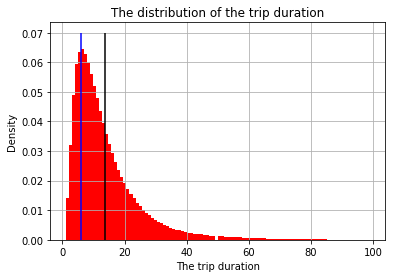

In [18]:
RQ3_functions.plot_distribution_trip_duration(filtered_trip_duration_df)

* It is **a right-skewed distribution**, in which the data tends to gradually taper off to a right long tail. This means that for long-lasting journeys, the longer the time, the less likely they are to occur.
* Outliers were filtered out previously. The data is from range (0, 100) minutes.
* **Mean = 13.6**. On average, the taxi trip duration is about 14 minutes.
* **Standard deviation = 11.3**
* **The mode = 6**. It means that the trips which lasts 6 minutes are very common. It seems to be reasonable.  

-------------
### Analysis and visualization for each borough

This analysis is based on __PULocationID__ - the location in which the taximeter was engaged.

At first, we merge the data frame with the trip duration with the taxi_lookup_file in order to get information about each borough. Then, we group by a borough and calculate some statistics like the mean and number of records. Finally, we visualise the distributions for each borough using seaborn library.

In [33]:
# Basic statistics for each borough
grouped_trip_duration_borough = RQ3_functions.merge_and_group_by(filtered_trip_duration_df).agg({'mean', 'count'})
grouped_trip_duration_borough

duration           
                  count       mean
Borough                           
Bronx             51387  18.410512
Brooklyn         667319  14.791699
EWR                 657  11.800609
Manhattan      48570759  12.297417
Queens          3247019  32.442868
Staten Island       513  25.436647
Unknown          793977  13.244881

Plotting the density histograms with fitted lines for each borough. 

c:\users\asia\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


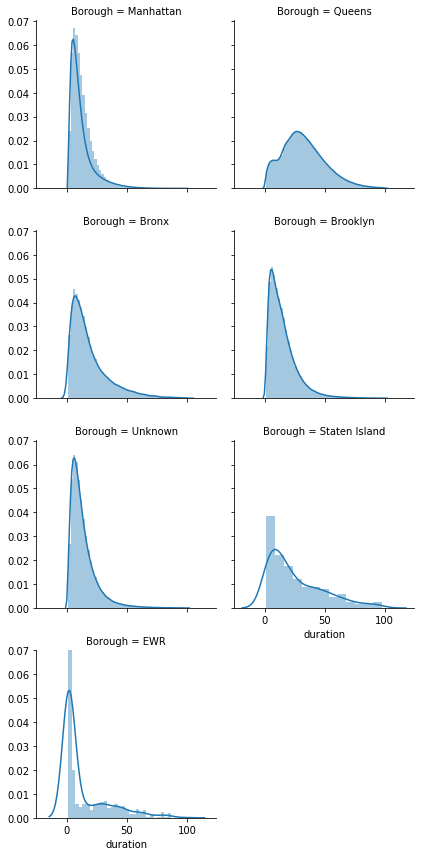

In [112]:
g = sns.FacetGrid(trip_duration_borough, col='Borough', col_wrap=2)
g = g.map(sns.distplot, "duration", kde=True)

It is obvious that **all trips do not last the same**. Distributions of their duration are different for each borough.
However, the brounghs: Bronx, MAnhattan and Brooklyn seems to be quite similar. They are right-skewed, as well. 
The borough EWR seems to be interesting, because there is a lot of very short-time trips. This borough has the smallest average length of taxi travel about 12 minutes.
The distribution for the Queens is more flattened. There are usually more medium-lasting trips. The average length of the trip is about 30 minutes.


# RQ4: What is the most common way of payments?

Now we are going to analyze the means of payment used around New York. First of all we will visualize the rough number of payments, than we will run some statistical analysis on them to obtain some extra informations. All the analysis will be conducted for each borough separately, and than merged thogheter.

We import the python libraries and the costume functions, defined in another file, that we will need for our analysis.

In [1]:
import RQ4_functions
import matplotlib.pyplot

We build a dictonary contaning as keys the name of the boroughs and as values a list of the IDs associated, as seen in the reference file.

In [2]:
boroughs = RQ4_functions.boroughsIdentifyer()

The next function will return a data frame contaning the number of payment methods for each borough (we will consider the borough where the passenger has been picked up). We will immediatly visualize it as a table to have an idea of what is going on.

In [3]:
payments = RQ4_functions.payment_category(boroughs)
payments

,EWR,Queens,Bronx,Manhattan,Staten Island,Brooklyn
Cash,551,1000615,26147,14479421,318,230510
Credit card,3036,2311117,27787,34186603,434,441856
Dispute,47,8936,360,63615,13,1923
No charge,220,37295,1515,226798,50,8789


First of all, let us visualize this data in a more convenient way: we will use an histogram. We will use a logarithmic scale for the y-axis as, as before, the number of taxi in manhattan in hugely more than the rest of the city.

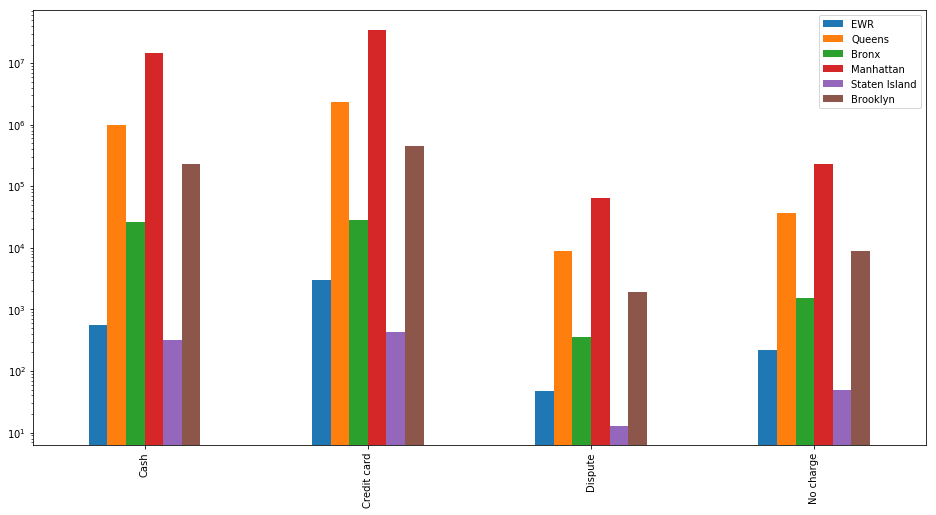

In [4]:
matplotlib.pyplot.show(payments.loc[:,[borough for borough in boroughs.keys()]].iloc[:].plot(kind='bar', logy= True, figsize = (16,8)))

Now it will also be nice to visualize them not by means of payment, but by borough. We will do it in a serie of pie charts this time, as we will be able in this way to better notice some differences.

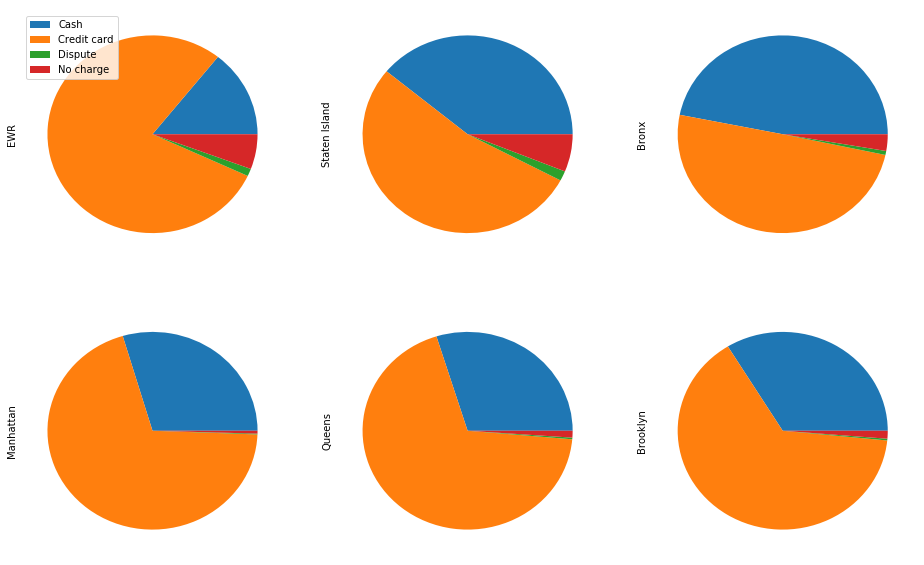

In [5]:
fig, axes = matplotlib.pyplot.subplots(nrows=2, ncols=3, figsize = (16,10))
c = 0
for borough in boroughs:
    payments.plot(kind = 'pie', y=borough, ax = axes[c % 2, c % 3], labels = None, legend = (c == 0))
    c+=1

As we can see the means of payment differ greatly from borough to borough. For example: people coming from the airport (ERW) mainly use the credit card as people in Manhattan, and people coming from Bronx use both.

It is intuitively clear that there is some sort of correlation between the means of payment and the borough. Now we will conduct a statistical analysis to confirm this intuition. We will run a $\chi^2$ test on our dataframe.

Let us say something on it. Given a I.I.D. $(X_1,\dots,X_k)$ we define $$Q=\sum_{i=1}^kX_i^2\sim\chi_k^2$$ a random variable with a $\chi^2$ distribution: that is, a random variable having as CDF $F_Q(x)$ the regularized gamma function $$F_Q(x)=\frac{\gamma(k/2,x/2)}{\Gamma(k/2)}$$ where $\gamma(\alpha,\beta)=\int_0^\beta t^{\alpha-1}e^{-t}dt$ is the incomplete gamma function and $\Gamma(\alpha)=\int_0^\infty t^{\alpha-1}e^{-t}dt$ the gamma function.

Now given a matrix $O$ of observations we can ask ourself if the row and columns of our matrix are or not indepente. To do that we will define the expected matrix $$E=\left(\frac{(\sum_kM_{i,k})(\sum_kM_{k,j})}{\sum_{a,b}M_{a,b}}\right)_{i,j}$$ That is, the matrix we would have if the values are totally independents. We than define the value $$c=\sum_{i,j}\frac{(E_{i,j}-O_{i,j})^2}{E_{i,j}}$$ Clearly we have that $c=0$ if and only if $O=E$, so $c$ is already a first indication of the independecies of the values, and in particular we can observe that the lower $c$ is the more independents our values are.

Now we will consider how much likely is that our value $c$ is result of a random variable with distribution $\chi^2_k$ where $k=(n-1)(m-1)$ where $m$ and $n$ are the dimensions of our matrices. In particular we wish to know the $p$-value, that is $$p=1-F_Q(c)$$ It represent the probability of $c$ to be smaller than $Q$, therefore a low value of $p$ means dependece, and a big one viceversa independence.

In practice we consider the values dependente if the $p$-value is lesser than $0.05$. In our particular case we defined a function that will compute the $p$-value of a matrix given in the form of a list of lists. We would pass to it our converted data frame.

In [6]:
p = RQ4_functions.chi_2([payments[borough].values.tolist() for borough in boroughs.keys()])
print(p)

0.0


We obtained as $p$-value a $0$ (do to an approximation). That is our confirmation, $p$ is largly lower than $0.05$, meaning that there is a correlation inbetween the payment means and the boroughs.

## RQ5: Does a long distance correlate with the duration of the trip on average? 

The next step is plotting the dependence between distance and duration of the trip. Before that, we need some exploratory analysis to clean our data. Then, we will show the distributions for both features and compute the Pearson Coefficient.

We import Python libraries and functions defined in another file that we will need for our analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

import RQ5_functions
import warnings; warnings.simplefilter('ignore')

During these analysis the most interesting columns are:
* **Trip_distance** - The elapsed trip distance in miles reported by the taximeter
* **tpep_pickup_datetime** - The date and time when the meter was engaged.
* **tpep_dropoff_datetime** - The date and time when the meter was disengaged. 

### Preparing and filtering data for each month
----------

We calculated the duration of all taxi journeys each month as in RQ3 question above. The information about the trip distance is located in column 'trip_distance'. The function **get_trip_duration_and_distance_all_months** calculates and selects these data and returns as a data frame.

In [5]:
# trip_duration_and_distance_df = pd.read_csv("D:/trip_duration_and_distance.csv")
trip_duration_and_distance_df = RQ5_functions.get_trip_duration_and_distance_all_months()

Let's look at the basic statistics describing our data. In particular, we turned our attention to the percentages that give information on how the data is distributed. We noticed that the 99th percentile is much smaller than the maximum value. This suggests that there are outliers in the data collected. For a more accurate analysis, we will now filter the most important data for both trip duration and trip_distance columns.

In [11]:
trip_duration_and_distance_df.describe(percentiles=[0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

,duration,trip_distance
count,5.392574e+07,5.392574e+07
mean,1.604486e+01,2.900861e+00
std,1.455252e+03,2.607412e+01
min,-1.066961e+07,0.000000e+00
50%,1.000000e+01,1.600000e+00
60%,1.300000e+01,2.000000e+00
70%,1.600000e+01,2.560000e+00
80%,2.000000e+01,3.600000e+00
90%,2.700000e+01,6.710000e+00
95%,3.600000e+01,1.073000e+01


**The trip duration: **
* Another important information that we obtained from the above analysis is the minimal trip duration. Of course, in reality, it is not possible to duration was negative. Similarly to the analysis from RQ3, it makes sense to not analyze the data that lasted 0 minutes. 
* According to the previous analysis [notebook for RQ3], we chose 100 minutes as the upper bound for the trip duration.

**The trip distance:**
* In the case of trip distance, the first reasonable assumption is that it cannot be equal to 0. 
* Morover, the 99th percentile trip_distance is about 19 miles, and the maximum is almost 190,000.
**What should be the upper bound for our data?** To be more certain, we check what is the percentile for a few scores.

In [16]:
print("Trip distance less than...")
for score in range(10, 100, 10):
    print("{0} miles -> {1:.3f} percentile".format(score, stats.percentileofscore(trip_duration_and_distance_df.trip_distance, score)))

Trip distance less than...
10 miles -> 94.341 percentile
20 miles -> 99.383 percentile
30 miles -> 99.961 percentile
40 miles -> 99.990 percentile
50 miles -> 99.996 percentile
60 miles -> 99.998 percentile
70 miles -> 99.999 percentile
80 miles -> 99.999 percentile
90 miles -> 100.000 percentile


* It seems wise to select trips where the distance is less than 30 miles, because after this filtration our data will still account for 99.96% of all data.

In [4]:
# Filtering according to our assumptions above
filtered_trip_duration_and_distance_df = trip_duration_and_distance_df[(trip_duration_and_distance_df.duration.between(0,100, inclusive=False))\
                                                                       & (trip_duration_and_distance_df.trip_distance.between(0, 30, inclusive=False))]

---------------
## Visualization of data

We plot the Cumulative Distribution Function:

Text(0.5,1,'The trip duration Cumulative DF')

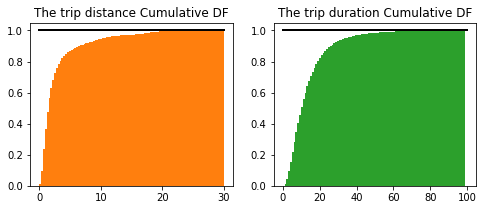

In [42]:
RQ5_functions.plot_cdf(filtered_trip_duration_and_distance_df)

In both cases, CDF quickly increases to 1. We also can see that our sample covers a majority of data. 

Then, we plot the density histograms for both 'trip_distance' and 'duration' columns:

Text(0.5,1,'The trip duration distribution')

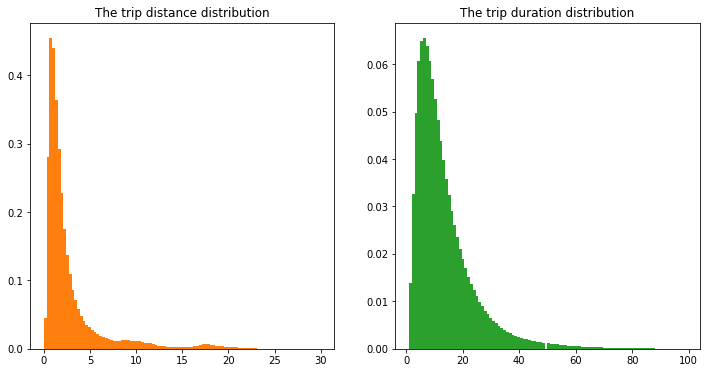

In [7]:
RQ5_functions.plot_density(filtered_trip_duration_and_distance_df)

* Both plots are the right-skewed distributions.They are not normally distributed.
* Most of the trip distances is about 2 miles. For the large distances, the decrease is very fast.

---------------

### Correlation between distance and duration of the trip.


* **Pearson** is the most widely used correlation coefficient. Pearson correlation measures the linear association between continuous variables. In other words, this coefficient quantifies the degree to which a relationship between two variables can be described by a line. [1]
* Pearson’s correlation requires for each dataset **to be normally distributed** [3]

__To have the normally distributed data, we calculated the logaritmic values for both datasets.__

The distributions are shown on marginal axes of the plot below.

In [5]:
# Adding Columns with the logaritmic values for the distance and duration
filtered_trip_duration_and_distance_df["log_trip_duration"] = np.log(filtered_trip_duration_and_distance_df.duration)
filtered_trip_duration_and_distance_df["log_trip_distance"] = np.log(filtered_trip_duration_and_distance_df.trip_distance)

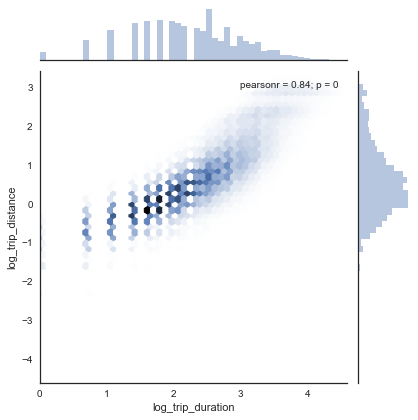

In [12]:
with sns.axes_style('white'):
    sns.jointplot("log_trip_duration", "log_trip_distance", sample_df, kind='hex')

The seaborn function automatically calculates the Pearson's Coefficient and the p-value.


* Function **scipy.stats.pearsonr(x, y)** -- Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

In [9]:
stats.pearsonr(filtered_trip_duration_and_distance_df["log_trip_duration"],filtered_trip_duration_and_distance_df["log_trip_distance"])

(0.8436771271402189, 0.0)

* The Pearson Correlation is about 0.84. There is **quite a strong, positive linear relationship** between the length and duration of the trip. We noticed the kind of linearity on the plot, as well.
* P-value is 0.0 and less than 0.05, so it means that the correlation is **statistically significant**

----------

Sources:
[1] https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials
[2] https://pandas.pydata.org
[3] https://docs.scipy.org/
[4] https://matplotlib.org

# Filtration

We have seen, after the different analysis in the precedent points, that there are many small problems in our datasets. Errors and wrongly registered data. Before stepping in the final part of our study we wish to clean the dataset to do our finial calculations on it.

We identified different criterias:
-  The value in 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' need to be in the right month and year.
- The duration of the trip must be higher than 0 and lower than 100 minutes, as found during the analysis of the RQ3.
- 'trip_distance' must be more than 0 and less than 50, as the longest reasonable root from the two must far away point of our map are more or less 44 miles far away.

We do it calling a function from another file, that we conveniently importe. It will create 6 new files, one for each month, contaning the cleaned data.

In [ ]:
import Filtration_function
Filtration_function.filter()

From now on, we will use this new filtred dataset.

# CRQ1: Does the fare for mile change across NY's borough?

Here we are going to analyze how much does a trip cost per mile, and compare that values between the boroughs.

We import the python libraries and the costume functions, defined in another file, that we will need for our analysis.

In [1]:
import CRQ1_functions
import matplotlib.pyplot

We build a dictonary contaning as keys the name of the boroughs and as values a list of the IDs associated, as seen in the reference file.

In [2]:
boroughs = CRQ1_functions.boroughsIdentifyer()

Now we are going to do two analisys. One over the price per mile of a trip, and nother on the price per mile of a trip weighted on the time of the trip. To do so we define two values $P$ and $Pw=\frac{P}{T}$ rispectivley the price per mile of a trip and it devided by the time the trip took. The aim of the second value $Pw$ is to take into account some possible variancies, for example the traffic.

To do so we call a function that will give us a dictonary of data frames where the keys are the boroughs, and the data frame contains the values of $P$ and $Pw$. In doing that, we exclude the trip for which $P>15$ and $P<0$ as we assume that they are do to errors, or other oddities non-interesting for an analysis as the one we are doing.

In [3]:
price_dfs = CRQ1_functions.price_calculator(boroughs)

First of all let us show what we obtained: we are going to visualize our datas in some graphs.

Plot for the values of P on the x-axis and how many occurences on the y-axis


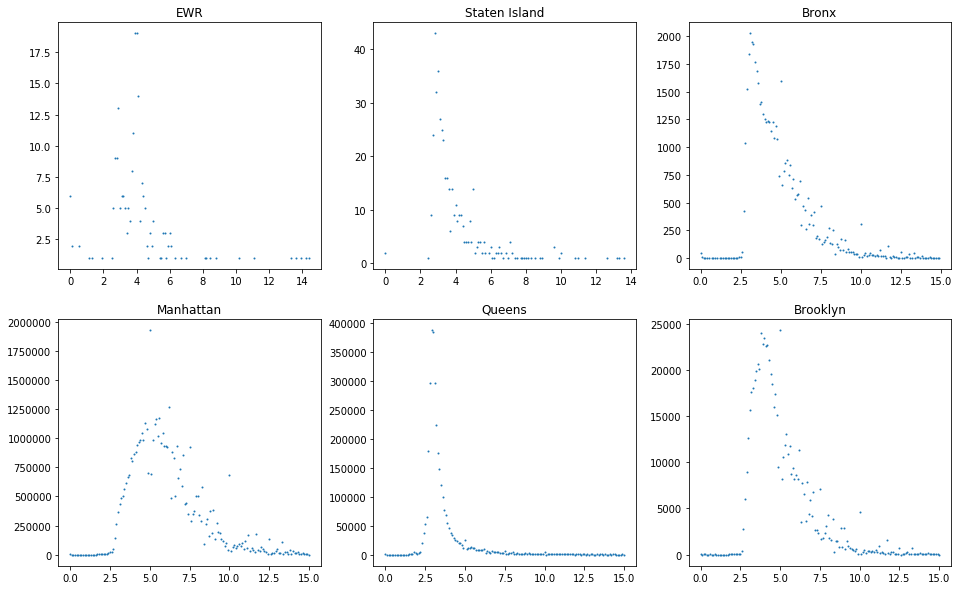

Plot for the values of Pw on the x-axis and how many occurences on the y-axis


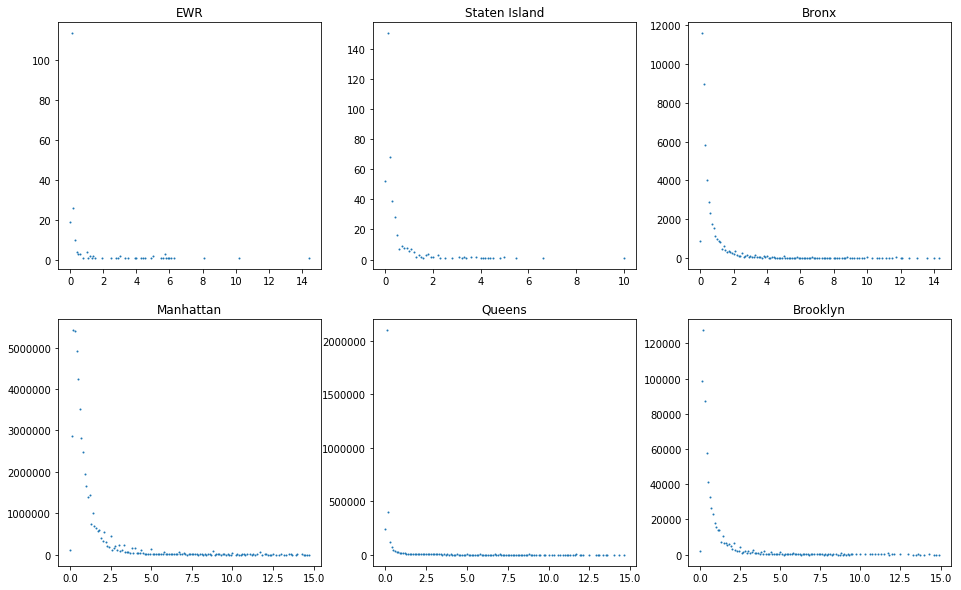

In [4]:
CRQ1_functions.grapher(price_dfs,boroughs)

Let us do some observations on thoses plots: we can clarly see that the data behave in similar ways for different boroughs (even if for EWR and Staten Island having a low amount of data make the graph not very clear).

We can observe that for $P$ the mean is, from borough to borough, inbetween 3 and 7, inducing us to think that there is a real and significant difference.

As for $Pw$ we don't notice a real difference anymore, at least from the graph.

In the end we didn't get a good final answer, so let us conduct some extra analysis, to try to understand what is going on.

Now we are going to compute mean and standard deviation of our datas. We will call a function that, given the data frame with the data, will return a couple of data frames containing the mean and standard deviation for $P$ and $Pw$ rispectively.

From a theoretical point of view we are considering a random variable $P$ that rappresent the price per mile of a trip and a sample of data, our values. We are now trying to infer information about the distribution that generated them.

In [5]:
Pdf, Pwdf = CRQ1_functions.mean_and_std(price_dfs,boroughs)

Let us observe what we obtained both as a simple table of values and as plots.

In [6]:
print('Mean and standard deviation for the value P')
Pdf

Mean and standard deviation for the value P


,Mean,Std
Manhattan,6.014227,2.059028
Brooklyn,4.969410,1.736342
Bronx,4.792749,1.820241
EWR,4.060818,2.124288
Staten Island,4.016794,1.772329
Queens,3.444867,1.130637


Mean of the values of P for the different boroughs with the standard deviation as error bars


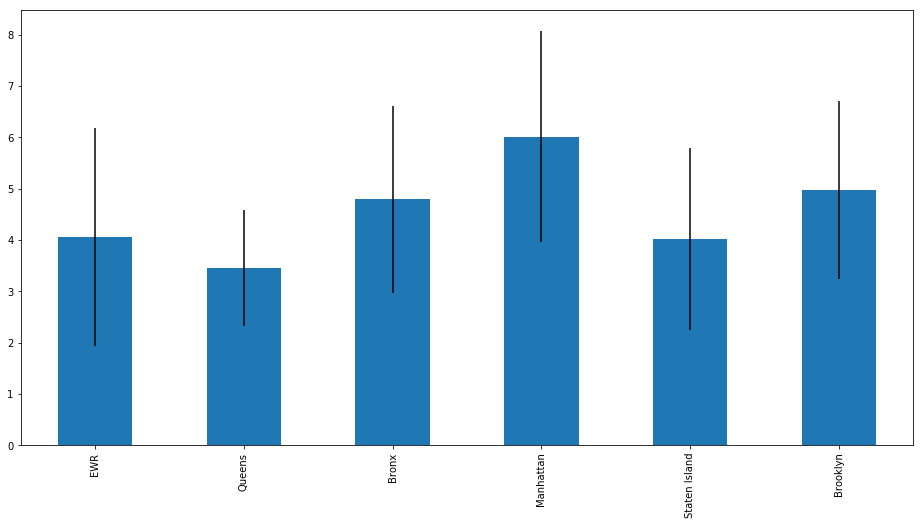

In [7]:
print('Mean of the values of P for the different boroughs with the standard deviation as error bars')
matplotlib.pyplot.show(Pdf.loc[[borough for borough in boroughs],['Mean']].plot(kind='bar', legend = False, yerr= list(map(lambda x:x[0],Pdf.loc[[borough for borough in boroughs],['Std']].values.tolist())), figsize = (16,8)))

In [8]:
print('Mean and standard deviation for the value Pw')
Pwdf

Mean and standard deviation for the value Pw


,Mean,Std
Manhattan,0.949533,1.231663
EWR,0.857146,1.923280
Brooklyn,0.758009,1.172647
Bronx,0.674276,1.173624
Staten Island,0.542046,1.034813
Queens,0.236065,0.626766


Mean of the values of Pw for the different boroughs with the standard deviation as error bars


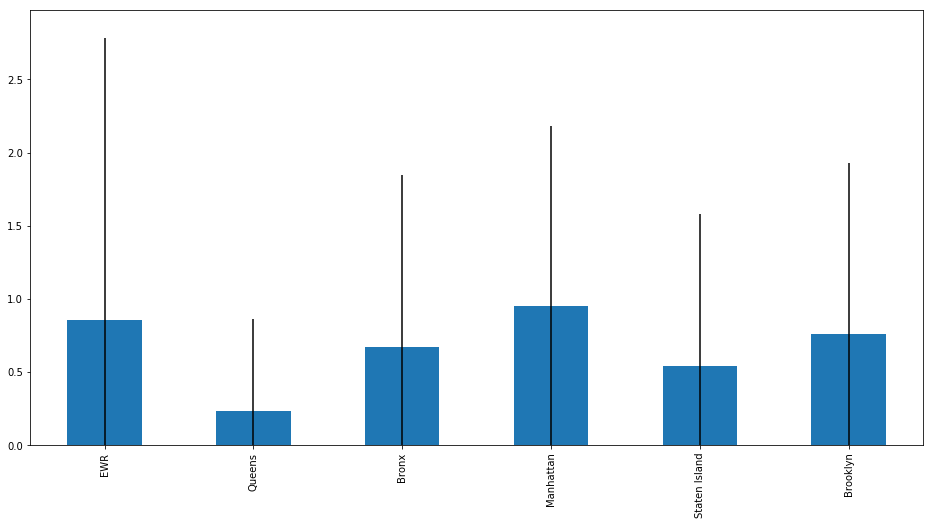

In [9]:
print('Mean of the values of Pw for the different boroughs with the standard deviation as error bars')
matplotlib.pyplot.show(Pwdf.loc[[borough for borough in boroughs],['Mean']].plot(kind='bar', legend = False, ylim=0, yerr= list(map(lambda x:x[0],Pwdf.loc[[borough for borough in boroughs],['Std']].values.tolist())), figsize = (16,8)))

As we observed before there is a strong difference in the mean for the values of $P$, things that bring us to think that in some zones taxis cost more per mile than in others. Once we normalize this data with the duration of the trip we can notice that the difference, while it still exists, is a lot less significant.

It is very interesting to us that once ordered this values by the mean both in the case of $P$ and of $Pw$ the boroughs are in the same order, excluding EWR. It seems therefore that including the time took for the trip heavly change the statistic for trip departing from EWR.

Aside from our observation, we are going to run some tests to check if these data are really dependents from the boroughs or 
not. To do so we are going to run the t-test on each couple of boroughs as, as we observed, is reasonable to assume that the distribution of the data follow a gaussian curve.

The next function will return two data frames, one for $P$ and the other for $Pw$, with as index of column and row the two boroughs compared, and as values the p-value of the t-test.

In [10]:
PTest, PwTest = CRQ1_functions.ttester(price_dfs,boroughs)

In [11]:
print('Table showing the result of the t-test for P.\nThe entry are, rispectively, the t-value and the p-value.')
PTest

Table showing the result of the t-test for P.
The entry are, rispectively, the t-value and the p-value.


,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
Bronx,1.0,0.0,0.000,0.0,0.0,0.000
Brooklyn,0.0,1.0,0.000,0.0,0.0,0.000
EWR,0.0,0.0,1.000,0.0,0.0,0.778
Manhattan,0.0,0.0,0.000,1.0,0.0,0.000
Queens,0.0,0.0,0.000,0.0,1.0,0.000
Staten Island,0.0,0.0,0.778,0.0,0.0,1.000


In [12]:
print('Table showing the result of the t-test for Pw.\nThe entry are, rispectively, the t-value and the p-value.')
PwTest

Table showing the result of the t-test for Pw.
The entry are, rispectively, the t-value and the p-value.


,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
Bronx,1.000,0.000,0.022,0.000,0.0,0.017
Brooklyn,0.000,1.000,0.211,0.000,0.0,0.000
EWR,0.022,0.211,1.000,0.267,0.0,0.006
Manhattan,0.000,0.000,0.267,1.000,0.0,0.000
Queens,0.000,0.000,0.000,0.000,1.0,0.000
Staten Island,0.017,0.000,0.006,0.000,0.0,1.000


As we can see our p-values are, in general, very low for $P$. That confirm our intuiton given from the means that the price change between different boroughs.

On the other hand for $Pw$ we clearly remark that the p-values of EWR are quite high, even above the trashold of $0.05$ for some borough. We shuold therefore consider it, as before, as a special borough. It is natural to have found some particularity on EWR. Ee already noticed before that considering the time took by the trip heavly modify the statistic for EWR.

Let us remark one last thing: the p-values for the couple Brooklyn-Queens is $0$, the one for EWR-Queens is $0$, but the one for EWR-Brooklyn is $0.272$. It may seems odd, but keep in mind that we know that the standard deviation for the $Pw$ of EWR is very high compared to the one of the others, therefore is not unattended some oddities about its data.

## CRQ2: Visualize Taxis movements! 

"NYC is divided in many Taxis zones. For each yellow cab trip we know the zone the Taxi pick up and drop off the users. "
We are going to visualize on a chropleth map:
* the number of trips that starts in each zone. 
* the number of trips that ends in each zone. 
We would like to compare these maps, as well. For that, we create the third map with the number of trips which are differences between 'start_trips' and 'end_trips'.

To perform this task we use the library folium.
The Geojson we use to trace the zones is taxi_zones.json in the Homework's repository.

In [1]:
import folium
import json
import requests
import pandas as pd
import CRQ2_functions

We download the 'taxi_zones.json' file from the Homework's repository.
We will also use data previously prepared and cleaned during the previous EDA (filtration.py). 

In [14]:
geojson_url = "https://github.com/CriMenghini/ADM-2018/raw/master/Homework_2/taxi_zones.json"
response = requests.get(geojson_url)
geojson = json.loads(response.text)

In [10]:
all_data_df = CRQ2_functions.get_cleaned_data()

cleaned_yellow_tripdata_2018-01.csv
cleaned_yellow_tripdata_2018-02.csv
cleaned_yellow_tripdata_2018-03.csv
cleaned_yellow_tripdata_2018-04.csv
cleaned_yellow_tripdata_2018-05.csv
cleaned_yellow_tripdata_2018-06.csv


In [15]:
taxi_zone_lookup = pd.read_csv("taxi_zone_lookup.csv")

To calculate the number of trips that starts and ends in each zone we need to:
* join on LocationID the data with taxi_zone_lookup file 
* group by the column "Zone" and count the number of trips.

Then, running the function **prepare_and_draw_colormap** (CRQ2_functions.py), we create a chropleth map colored by the amount of the trips.

In [16]:
start_trip_location = pd.merge(all_data_df, taxi_zone_lookup, left_on='PULocationID' , right_on='LocationID')
end_trip_location = pd.merge(all_data_df, taxi_zone_lookup, left_on='DOLocationID' , right_on='LocationID')

start_grouped_by_zone = start_trip_location[['Zone', 'PULocationID']].groupby(['Zone']).agg({'count'})
end_grouped_by_zone = end_trip_location[['Zone', 'DOLocationID']].groupby(['Zone']).agg({'count'})

________
* To see the map colored by the number of 'start_trips', please open the file **"Start_trips_map.html"** from a repository.

In [182]:
start_map = CRQ2_functions.prepare_and_draw_colormap(start_grouped_by_zone, column = 'PULocationID', file='Start_trips_map.html')

'Freshkills Park'


_________
* To see the map colored by the number of 'start_trips', please open the file **"End_trips_map.html"** from a repository.

In [183]:
end_map = CRQ2_functions.prepare_and_draw_colormap(end_grouped_by_zone, column = 'DOLocationID', file='End_trips_map.html')

'Great Kills Park'


______________
In order to visualise the differences between these maps, we calculate the difference between the number of trips that starts and ends in each zone.

**'difference'** = **number_of_trips that starts**  -  **number_of_trips that ends** 

In [181]:
joined_grouped_by_zone = start_grouped_by_zone.join(end_grouped_by_zone)
joined_grouped_by_zone['difference'] = joined_grouped_by_zone['PULocationID'] - joined_grouped_by_zone['DOLocationID']

joined_grouped_by_zone.sort_values(['difference'], ascending=False).head()

,PULocationID,DOLocationID,difference
,count,count,
Zone,,,
LaGuardia Airport,1497471,583484.0,913987.0
JFK Airport,1219862,398411.0,821451.0
Penn Station/Madison Sq West,1775762,1385359.0,390403.0
Garment District,1102072,822772.0,279300.0
Upper East Side South,2216156,1940867.0,275289.0


In [189]:
joined_grouped_by_zone.sort_values(['difference'], ascending=True).head()

,PULocationID,DOLocationID,difference
,count,count,
Zone,,,
East Harlem South,379709,642722.0,-263013.0
West Chelsea/Hudson Yards,753557,981386.0,-227829.0
East Harlem North,212792,418717.0,-205925.0
Two Bridges/Seward Park,88200,250158.0,-161958.0
Astoria,85583,231153.0,-145570.0


* To see the map colored by the differences in number of 'start_trips' and 'end_trips', please open the file **"Diff_trips_map.html"** from a repository.

In [184]:
diff_map = CRQ2_functions.prepare_and_draw_colormap(joined_grouped_by_zone, column = 'difference', file='Diff_trips_map.html')

'Freshkills Park'
Thresholds are not sorted.


### Basic Results
________
**We noticed that at LaGuardia and JFK Airport airports is the biggest difference between pick-ups and drop-offs, with more pick-ups**. This seems to be a sensible result as there are airports, where the taxi traffic is usually high.


**In the case of East Harlem South, West Chelsea / Hudson Yards, East Harlem North the difference is also significant, but with more drop-offs than pickups.**

**We also observed high taxi traffic in most of the zones in the Manhattan area.**